<a href="https://colab.research.google.com/github/fxrdhan/Machine-Learning-Project/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Your_Name.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


## Tentang Dataset
Dataset ini merupakan no-labelled data transaksi e-commerce berbasis di UK yang menjual hadiah dan peralatan rumah tangga untuk dewasa dan anak-anak melalui website sejak 2007. Karakteristik utama dataset:

- Periode: Data transaksi selama satu tahun
- Volume: 500,000 baris data
- Cakupan: Transaksi internasional dengan pelanggan dari berbagai negara
- Tipe Pelanggan: Konsumen langsung dan bisnis kecil yang membeli dalam jumlah besar

## Deskripsi Fitur-Fitur
Dataset memiliki 8 kolom dengan detail sebagai berikut:

- TransactionNo (kategorikal): Nomor unik 6-digit untuk setiap transaksi. Kode "C" mengindikasikan pembatalan
- Date (numerik): Tanggal generasi transaksi
- ProductNo (kategorikal): Karakter unik 5-6 digit untuk identifikasi produk
- Product (kategorikal): Nama produk/item
- Price (numerik): Harga per unit dalam pound sterling (£)
- Quantity (numerik): Kuantitas produk per transaksi. Nilai negatif menunjukkan pembatalan
- CustomerNo (kategorikal): Nomor unik 5-digit untuk identifikasi pelanggan
- Country (kategorikal): Negara tempat tinggal pelanggan

Ada sebagian kecil pembatalan pesanan dalam kumpulan data. Sebagian besar pembatalan ini disebabkan oleh kondisi kehabisan stok pada beberapa produk. Dalam situasi ini, pelanggan cenderung membatalkan pesanan karena mereka ingin semua produk dikirim sekaligus.

Dataset source: [Kaggle](https://www.kaggle.com/datasets/gabrielramos87/an-online-shop-business).

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
!pip install pandas numpy matplotlib seaborn plotly scikit-learn yellowbrick scipy

In [3]:
# Data manipulation & analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine Learning & Clustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Distance metrics
from scipy.spatial.distance import cdist

# Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif

# Set pandas display
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

In [4]:
df = pd.read_csv('https://media.githubusercontent.com/media/fxrdhan/Machine-Learning-Project/refs/heads/main/data/Sales%20Transaction%20v.4a.csv')

In [5]:
df[df['TransactionNo'].str.contains("C")]

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
1616,C581484,12/9/2019,23843,Paper Craft Little Birdie,6.190,-80995,16446.000,United Kingdom
1617,C581490,12/9/2019,22178,Victorian Glass Hanging T-Light,6.190,-12,14397.000,United Kingdom
1618,C581490,12/9/2019,23144,Zinc T-Light Holder Stars Small,6.040,-11,14397.000,United Kingdom
1619,C581568,12/9/2019,21258,Victorian Sewing Box Large,6.190,-5,15311.000,United Kingdom
1620,C581569,12/9/2019,84978,Hanging Heart Jar T-Light Holder,6.190,-1,17315.000,United Kingdom
...,...,...,...,...,...,...,...,...
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,18.960,-2,12472.000,Germany
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.090,-3,12472.000,Germany
536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.740,-1,12472.000,Germany
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.350,-4,12472.000,Germany


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB
None


In [7]:
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.470,12,17490.000,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.650,36,13069.000,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.530,12,13069.000,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.650,12,13069.000,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.940,6,13069.000,United Kingdom


**Verifikasi Kriteria Minimal**:
- Jumlah baris: 536,350 (jauh melebihi minimal 2,500)
- Jumlah kolom: 8 (melebihi minimal 5)

# **4. Exploratory Data Analysis (EDA)**


In [8]:
print("Dataset Dimensions:", df.shape)
print("\nNumber of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Dataset Dimensions: (536350, 8)

Number of rows: 536350
Number of columns: 8


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB
None


In [10]:
print("\nData Types of Each Column:")
df.dtypes


Data Types of Each Column:


,0
TransactionNo,object
Date,object
ProductNo,object
ProductName,object
Price,float64
Quantity,int64
CustomerNo,float64
Country,object


In [11]:
# Cek missing values
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
missing_df

,Missing Values,Percentage
TransactionNo,0,0.000
Date,0,0.000
ProductNo,0,0.000
ProductName,0,0.000
Price,0,0.000
Quantity,0,0.000
CustomerNo,55,0.010
Country,0,0.000


In [12]:
df.describe(include= "all")

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
count,536350,536350,536350,536350,536350.000,536350.000,536295.000,536350
unique,23204,305,3768,3768,NaN,NaN,NaN,38
top,573585,12/5/2019,85123A,Cream Hanging Heart T-Light Holder,NaN,NaN,NaN,United Kingdom
freq,1111,5299,2378,2378,NaN,NaN,NaN,485095
mean,NaN,NaN,NaN,NaN,12.662,9.919,15227.893,NaN
std,NaN,NaN,NaN,NaN,8.490,216.662,1716.583,NaN
min,NaN,NaN,NaN,NaN,5.130,-80995.000,12004.000,NaN
25%,NaN,NaN,NaN,NaN,10.990,1.000,13807.000,NaN
50%,NaN,NaN,NaN,NaN,11.940,3.000,15152.000,NaN
75%,NaN,NaN,NaN,NaN,14.090,10.000,16729.000,NaN


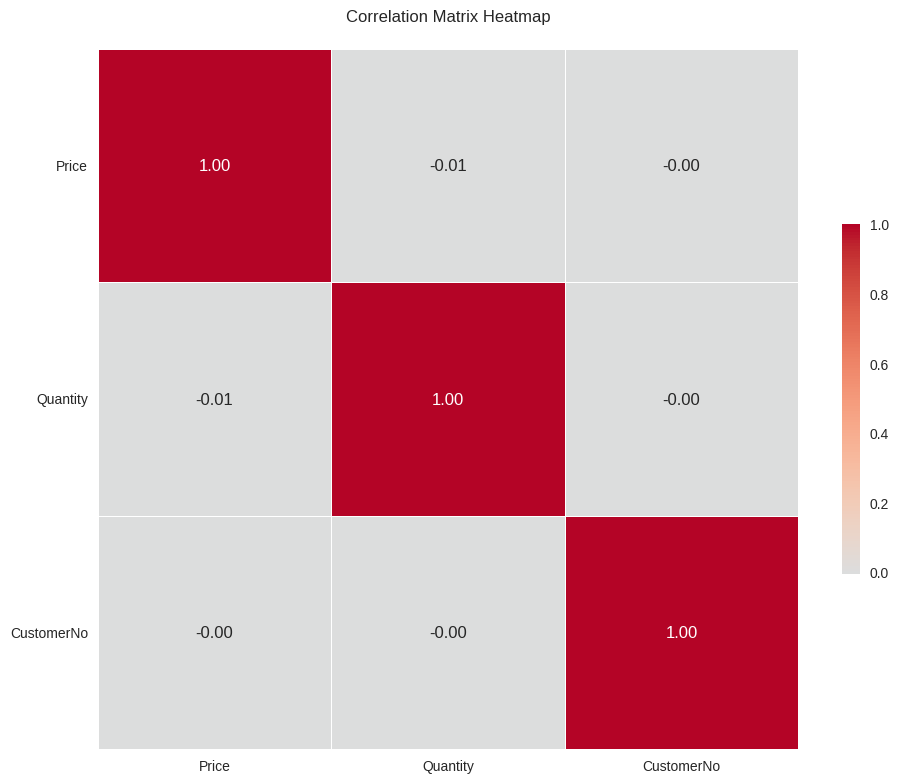

In [13]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation,
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f',
            square=True,
            linewidths=0.5,
            cbar_kws={'shrink': .5})

plt.yticks(rotation=0)

plt.title('Correlation Matrix Heatmap', pad=20)

plt.tight_layout()

plt.show()

## Temporal Analysis Visualization

### Daily Transaction Patterns

In [14]:
df['Date'] = pd.to_datetime(df['Date'])

daily_trans = df.groupby('Date').size().reset_index(name='count')

print("\nStatistics of daily transactions:")
print(daily_trans['count'].describe())


Statistics of daily transactions:
count    305.000
mean    1758.525
std      823.893
min      279.000
25%     1213.000
50%     1555.000
75%     2097.000
max     5299.000
Name: count, dtype: float64


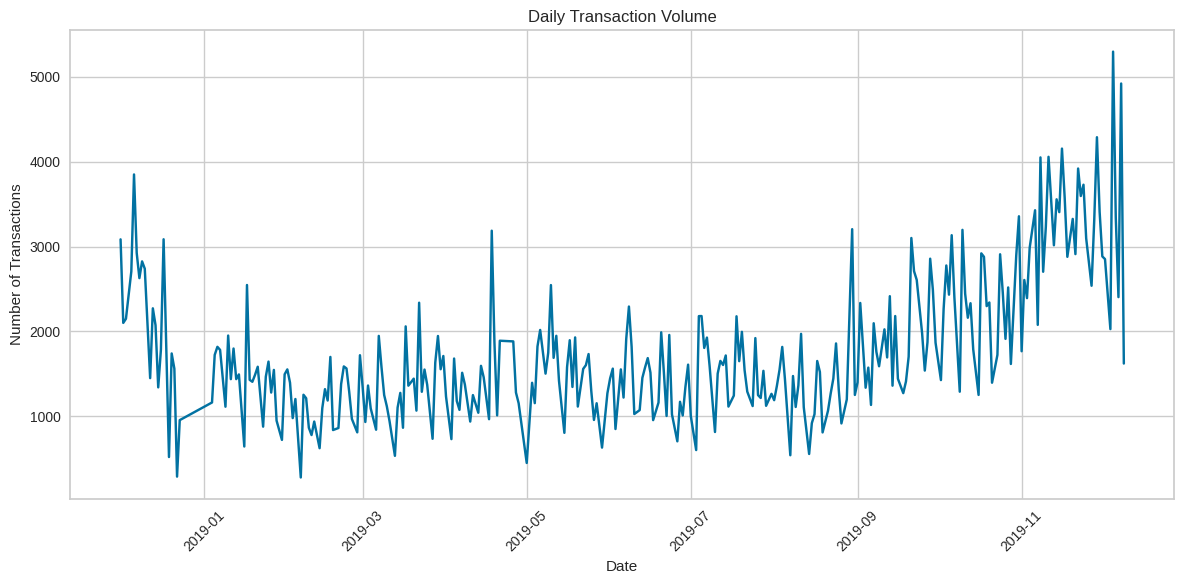

In [15]:
plt.figure(figsize=(12, 6))
daily_trans = df.groupby('Date').size().reset_index(name='count')
plt.plot(daily_trans['Date'], daily_trans['count'])
plt.title('Daily Transaction Volume')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Average Daily Transactions: 1,759 transactions

Peak Day Volume: 5,299 transactions

Date Range: December 1, 2018 to December 9, 2019

Notable Observations:
  - Clear upward trend in daily volumes towards end of 2019.
  - Higher volatility in later months suggests business growth.

### Day of Week Transactions

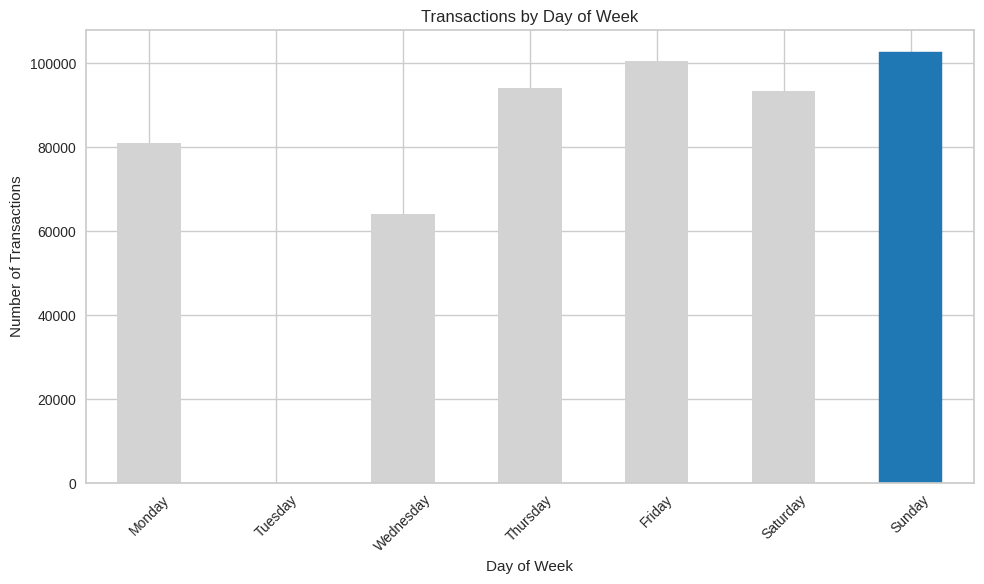

In [16]:
plt.figure(figsize=(10, 6))
df['DayOfWeek'] = df['Date'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
transactions_by_day = df['DayOfWeek'].value_counts().reindex(day_order)

# Create bar plot first
ax = transactions_by_day.plot(kind='bar', color='lightgray')
bars = ax.patches

# Find the highest bar and color it
max_value = transactions_by_day.max()
for bar in bars:
    if bar.get_height() == max_value:
        bar.set_color('#1f77b4')

plt.title('Transactions by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Busiest Day: Sunday

Weekly Transaction Distribution:
- Weekend Peak: Highest volumes on Sundays
- Strong Friday Performance: Second busiest day
- Mid-week Dip: Lower volumes on Wednesday
- Consistent Monday Performance: Moderate volume

### Monthly Transaction Trends

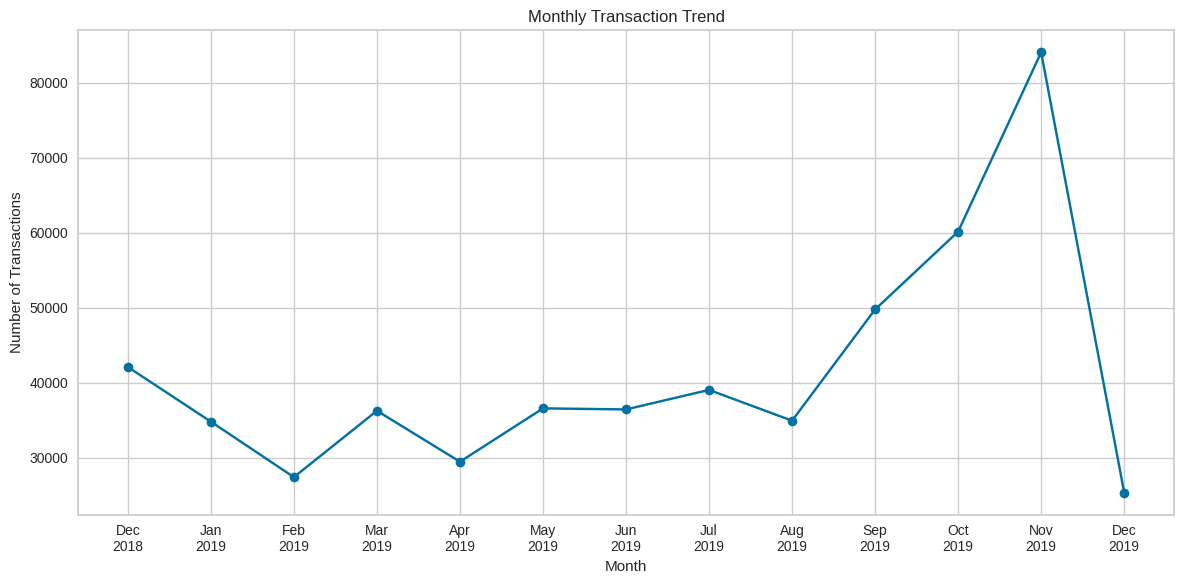

In [17]:
df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(12, 6))

monthly_trans = df.groupby(df['Date'].dt.strftime('%Y-%m')).size()

plt.plot(range(len(monthly_trans)), monthly_trans.values, marker='o')

plt.xticks(range(len(monthly_trans)),
           [pd.to_datetime(date + '-01').strftime('%b\n%Y') for date in monthly_trans.index])

plt.title('Monthly Transaction Trend')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.tight_layout()
plt.show()

Busiest Month: November (Month 11)

Seasonal Patterns:
- Strong Year-End Performance: Oct-Nov peak
- Summer Plateau: Jun-Aug steady state
- Early Year Dip: Feb-Apr lower volumes

Key Observations:
- Dramatic growth in Q4 2019
- Clear holiday season impact

In [18]:
temporal_stats = {
    'Busiest Day': df['DayOfWeek'].mode()[0],
    'Busiest Month': df.groupby(df['Date'].dt.month).size().idxmax(),
    'Average Daily Transactions': daily_trans['count'].mean(),
    'Peak Day Transactions': daily_trans['count'].max(),
    'Date Range': f"{df['Date'].min().date()} to {df['Date'].max().date()}"
}

temporal_stats

{'Busiest Day': 'Sunday',
 'Busiest Month': 11,
 'Average Daily Transactions': 1758.5245901639344,
 'Peak Day Transactions': 5299,
 'Date Range': '2018-12-01 to 2019-12-09'}

## Price and Quantity Analysis Visualization

### Price Distribution

In [19]:
df['Price'].describe()

,Price
count,536350.000
mean,12.662
std,8.490
min,5.130
25%,10.990
50%,11.940
75%,14.090
max,660.620


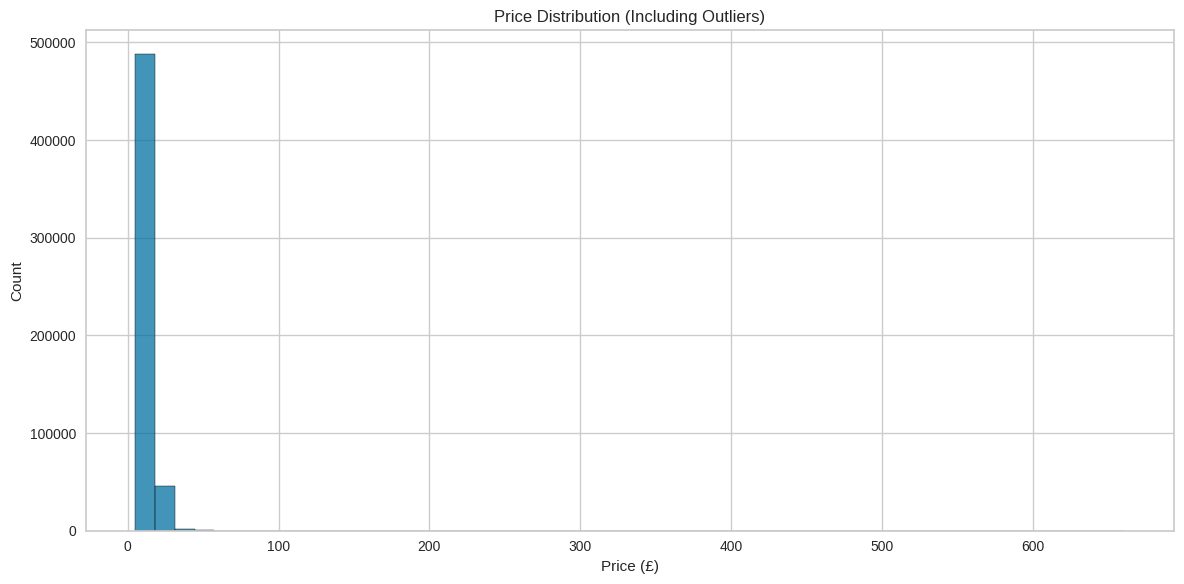

In [20]:
# Price distribution (including outliers)
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Price', bins=50)
plt.title('Price Distribution (Including Outliers)')
plt.xlabel('Price (£)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

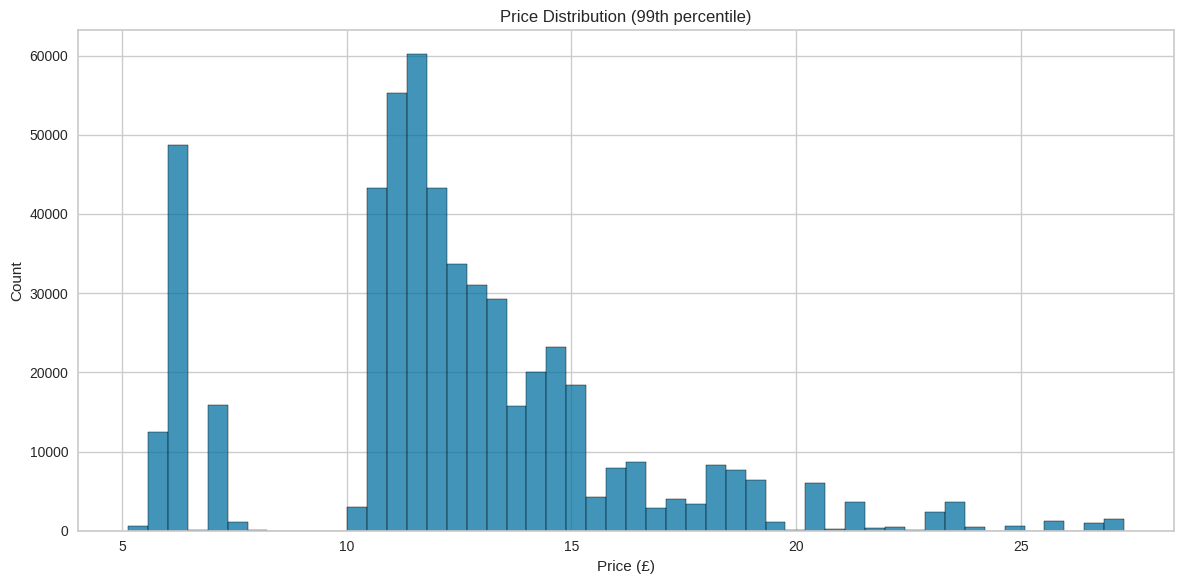

In [21]:
# Price distribution (without outliers)
plt.figure(figsize=(12, 6))
sns.histplot(data=df[df['Price'] <= df['Price'].quantile(0.99)],
            x='Price', bins=50)
plt.title('Price Distribution (99th percentile)')
plt.xlabel('Price (£)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Primary Price Clusters:
  - Budget Segment: £5-8 (small peak)
  - Core Segment: £10-15 (dominant range)
  - Premium Segment: £20+ (long tail)

Key Observations:
  - Strong concentration around £12-13
  - Premium outliers up to £660.62

### Quantity Distribution

In [22]:
df['Quantity'].describe()

,Quantity
count,536350.000
mean,9.919
std,216.662
min,-80995.000
25%,1.000
50%,3.000
75%,10.000
max,80995.000


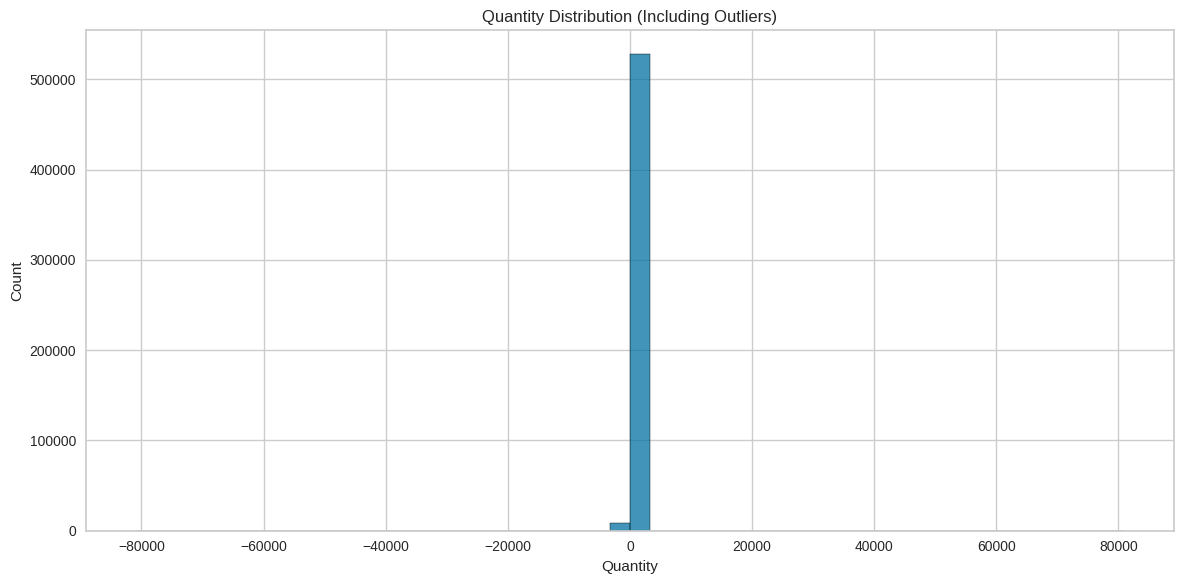

In [23]:
# Quantity distribution (including outliers)
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Quantity', bins=50)
plt.title('Quantity Distribution (Including Outliers)')
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Quantity')

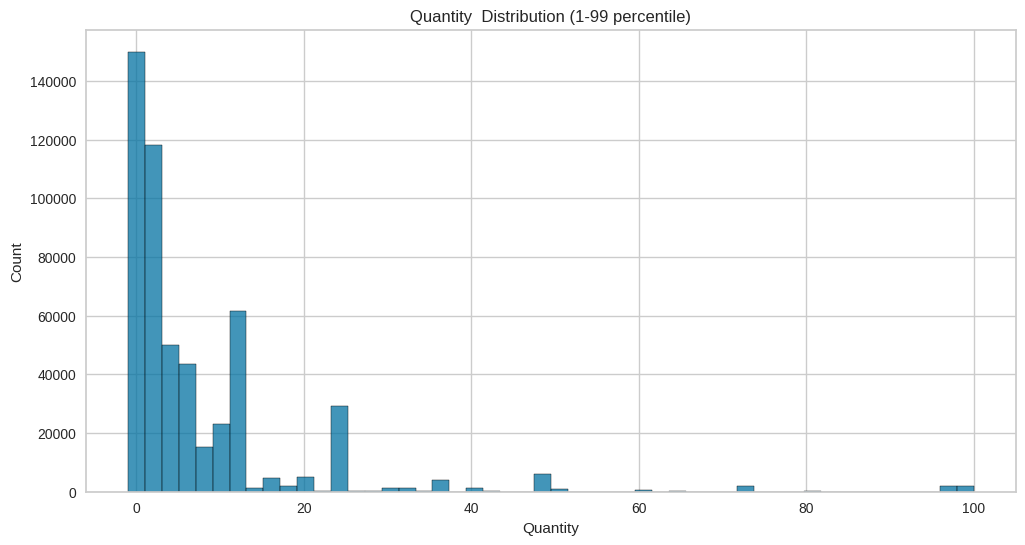

In [24]:
# Quantity distribution (without outliers)
plt.figure(figsize=(12, 6))
quantity_data = df[df['Quantity'].between(df['Quantity'].quantile(0.01), df['Quantity'].quantile(0.99))]
sns.histplot(data=quantity_data, x='Quantity', bins=50)
plt.title('Quantity  Distribution (1-99 percentile)')
plt.xlabel('Quantity')

Order Size Categories:
  - Small Orders (1-3 units): Most common
  - Medium Orders (4-10 units): Regular occurrence
  - Bulk Orders (>10 units): Long tail
  - Returns/Cancellations: Negative values present

Key Insights:
  - Highly right-skewed distribution
  - Dominant small-order business model
  - Significant bulk order component
  - Presence of order cancellations

### Price Distribution by Quantity Range

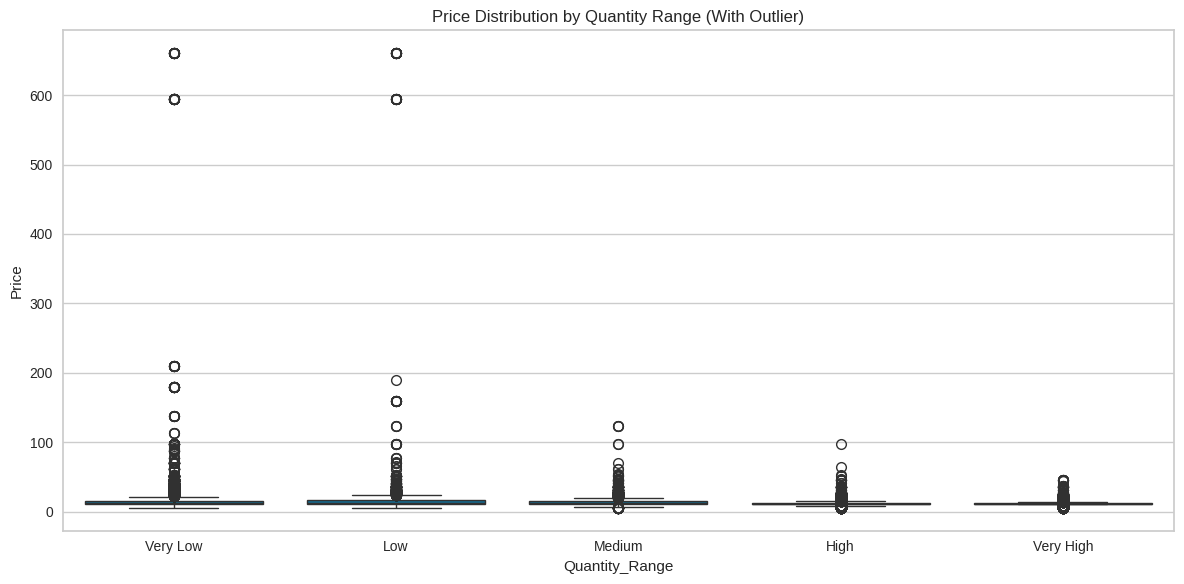

In [25]:
plt.figure(figsize=(12, 6))
df['Quantity_Range'] = pd.qcut(df['Quantity'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
sns.boxplot(data=df, x='Quantity_Range', y='Price')
plt.title('Price Distribution by Quantity Range (With Outlier)')
plt.tight_layout()
plt.show()

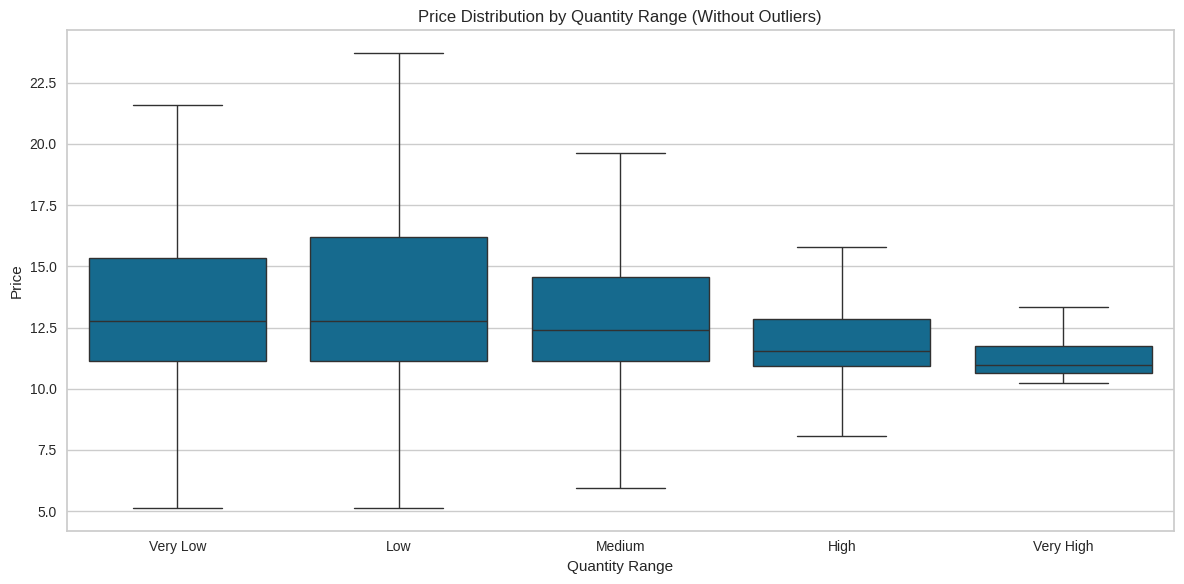

In [26]:
plt.figure(figsize=(12, 6))

df['Quantity_Range'] = pd.qcut(df['Quantity'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Create box plot without outliers
sns.boxplot(data=df, x='Quantity_Range', y='Price', showfliers=False)

plt.title('Price Distribution by Quantity Range (Without Outliers)')
plt.xlabel('Quantity Range')
plt.ylabel('Price')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Quantity Range Impact:
  - Clear trend of decreasing price variability as quantity increases
  - Systematic reduction in median prices across quantity ranges
  - Most extreme prices appear in lower quantity ranges

Outlier Patterns:
- Premium price outliers (£500-£700) primarily appear in Very Low and Low quantity ranges
- Outlier frequency and magnitude decrease with increasing quantity
- Secondary outlier band around £200 visible across most quantity ranges

### Correlation Analysis

In [27]:
price_quantity_stats = {
    'Price Statistics': df['Price'].describe(),
    'Quantity Statistics': df['Quantity'].describe(),
    'Correlation': df['Price'].corr(df['Quantity']),
    'Most Common Price Range': f"£{df['Price'].quantile(0.25):.2f} - £{df['Price'].quantile(0.75):.2f}",
    'Most Common Quantity Range': f"{df['Quantity'].quantile(0.25):.0f} - {df['Quantity'].quantile(0.75):.0f}"
}

price_quantity_stats

{'Price Statistics': count   536350.000
 mean        12.662
 std          8.490
 min          5.130
 25%         10.990
 50%         11.940
 75%         14.090
 max        660.620
 Name: Price, dtype: float64,
 'Quantity Statistics': count   536350.000
 mean         9.919
 std        216.662
 min     -80995.000
 25%          1.000
 50%          3.000
 75%         10.000
 max      80995.000
 Name: Quantity, dtype: float64,
 'Correlation': -0.007181751879960804,
 'Most Common Price Range': '£10.99 - £14.09',
 'Most Common Quantity Range': '1 - 10'}

Price Quantity Stats:
- Price-Quantity Correlation: -0.007 (virtually independent)
- No significant bulk discounting pattern
- Price stability across order sizes

## Customer Analysis Visualization

In [28]:
# Calculate customer metrics
customer_metrics = df.groupby('CustomerNo').agg({
    'TransactionNo': 'count',
    'Price': lambda x: (x * df.loc[x.index, 'Quantity']).sum(),
    'Quantity': 'sum'
}).rename(columns={
    'TransactionNo': 'Purchase_Frequency',
    'Price': 'Total_Spent',
    'Quantity': 'Total_Items'
})

### Customer Purchase Frequency Distribution

In [29]:
customer_metrics['Purchase_Frequency'].describe()

,Purchase_Frequency
count,4738.000
mean,113.190
std,238.244
min,1.000
25%,19.000
50%,51.000
75%,132.000
max,7967.000


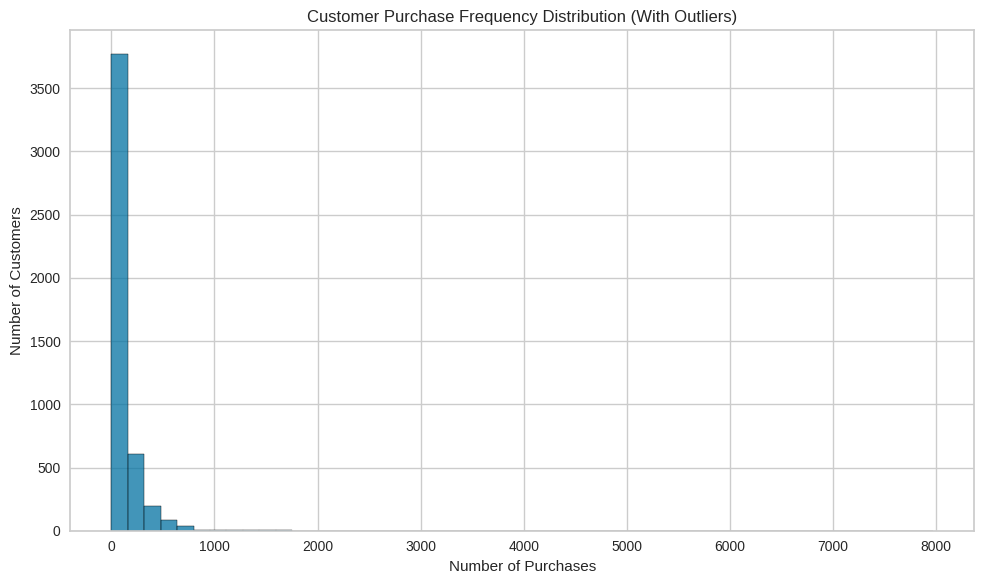

In [30]:
# Purchase frequency distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=customer_metrics, x='Purchase_Frequency', bins=50)
plt.title('Customer Purchase Frequency Distribution (With Outliers)')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

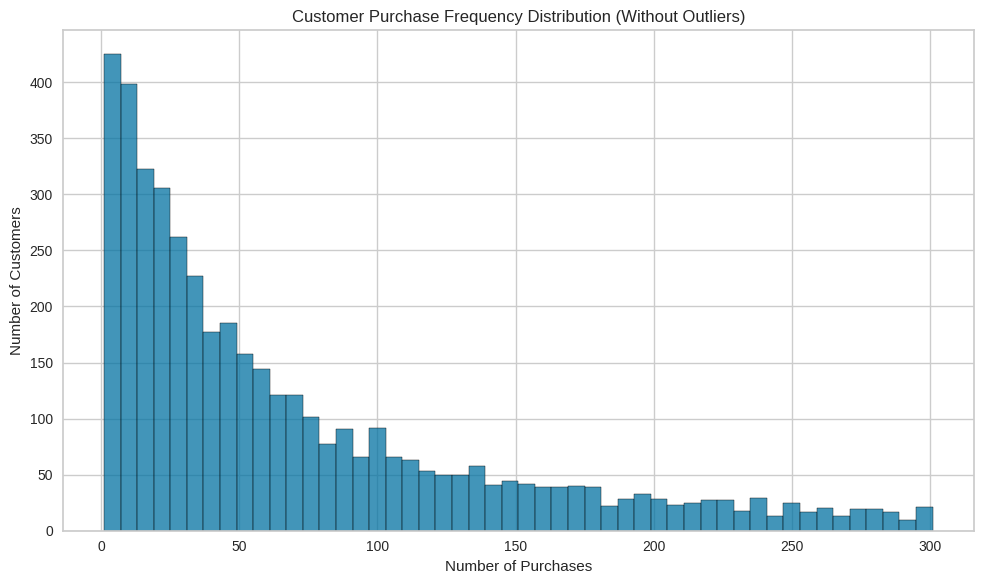

In [31]:
# Calculate IQR and bounds for Purchase_Frequency
Q1 = customer_metrics['Purchase_Frequency'].quantile(0.25)
Q3 = customer_metrics['Purchase_Frequency'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data to remove outliers
filtered_data = customer_metrics[
    (customer_metrics['Purchase_Frequency'] >= lower_bound) &
    (customer_metrics['Purchase_Frequency'] <= upper_bound)
]

# Create the plot
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_data, x='Purchase_Frequency', bins=50)
plt.title('Customer Purchase Frequency Distribution (Without Outliers)')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

Overall Distribution Pattern:
- Highly right-skewed distribution with a long tail
- Total unique customers: 4,738
- Mean purchases: 113.19 per customer
- Median purchases: 51 (indicating high skewness)

Customer Segmentation by Frequency:
- Low-frequency buyers (majority): 1-50 purchases
- Medium-frequency buyers: 51-150 purchases
- High-frequency buyers (minority): >150 purchases
- Extreme buyers (outliers): >1000 purchases, max at 7,967

Key Insights:
- Large gap between casual and heavy buyers
- High variance in purchase behavior (std: 238.244)
- Most customers concentrate in low-frequency range

### Customer Total Spent Distribution

In [32]:
customer_metrics['Total_Spent'].describe()

,Total_Spent
count,4738.000
mean,12726.436
std,50535.780
min,-3722.460
25%,1784.015
50%,4691.930
75%,11718.650
max,2108959.950


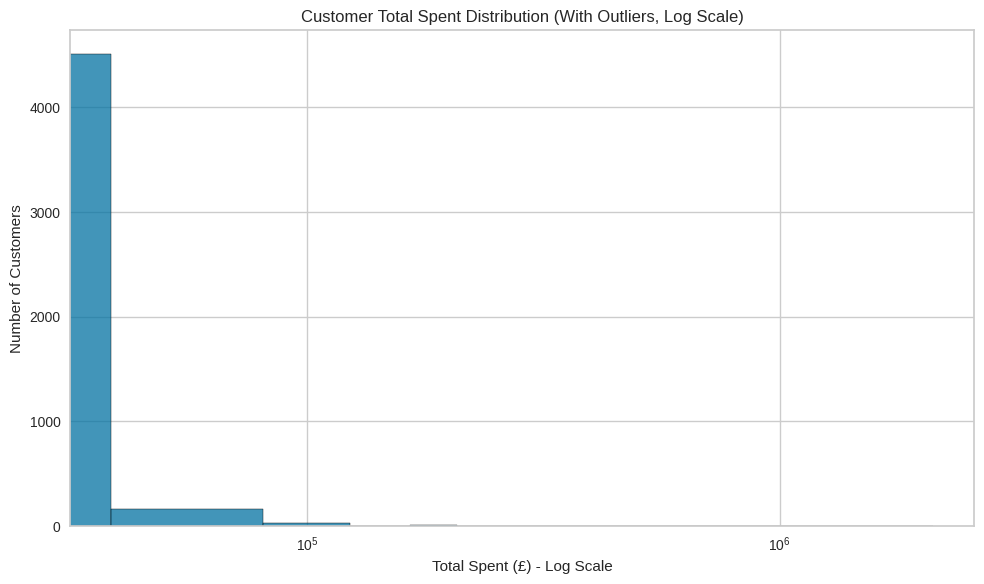

In [33]:
# Total spent distribution with outliers
plt.figure(figsize=(10, 6))
sns.histplot(data=customer_metrics, x='Total_Spent', bins=50)
plt.xscale('log') # log scale
plt.title('Customer Total Spent Distribution (With Outliers, Log Scale)')
plt.xlabel('Total Spent (£) - Log Scale')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

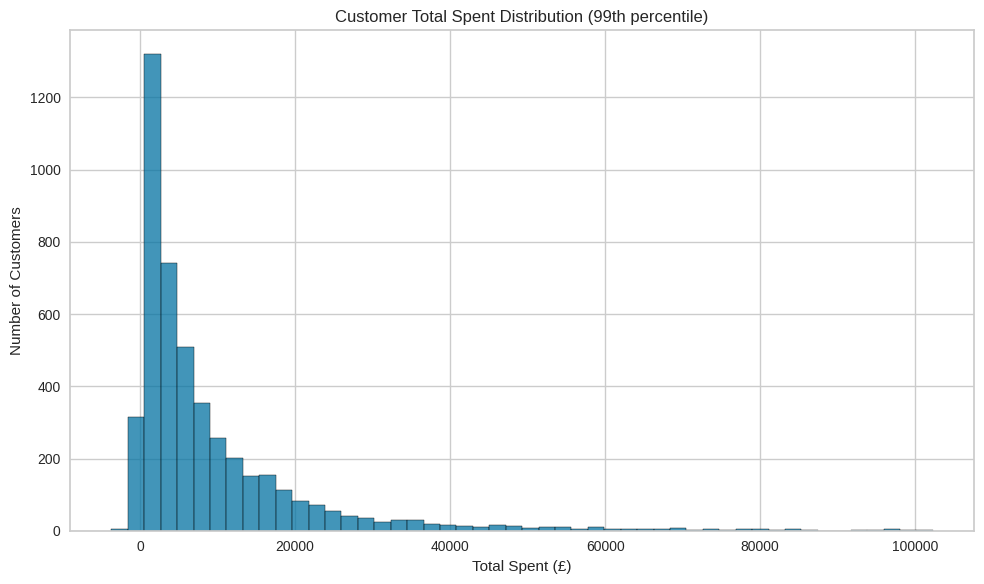

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(data=customer_metrics[customer_metrics['Total_Spent'] <=
                                  customer_metrics['Total_Spent'].quantile(0.99)],
            x='Total_Spent', bins=50)
plt.title('Customer Total Spent Distribution (99th percentile)')
plt.xlabel('Total Spent (£)')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

Distribution Pattern:
- Extremely right-skewed (shown in log-scale visualization)
- Majority of customers concentrated in lower spending ranges
- Long tail of high-value customers
- Notable gap between average and high-spending customers

Key Insights:
- Large spending disparity among customers
- Small segment of very high-value customers (>£100k)
- Presence of negative values indicating returns/refunds
- Quartile analysis shows 75% of customers spend under £11,718.65

### Purchase Frequency vs Total Spent

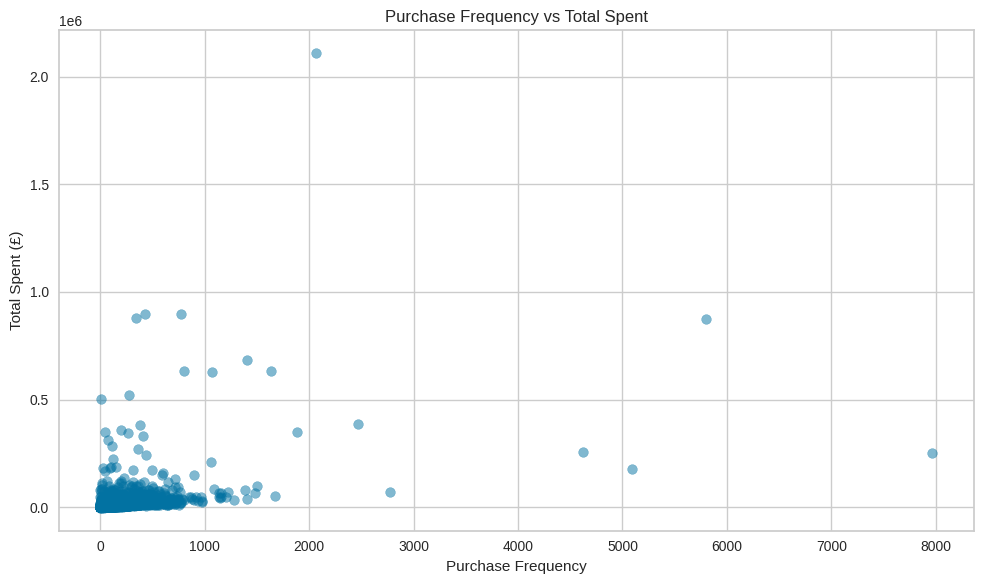

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(customer_metrics['Purchase_Frequency'],
            customer_metrics['Total_Spent'],
            alpha=0.5)
plt.title('Purchase Frequency vs Total Spent')
plt.xlabel('Purchase Frequency')
plt.ylabel('Total Spent (£)')
plt.tight_layout()
plt.show()

Concentration in the Lower Left Section:
- Most of the data points are clustered in the lower left area of the graph, which indicates that most customers have relatively low purchase frequency and total spending.

Outliers:
- There are a few points at the top of the graph that show customers with very high total spending.
- These are customers who may be big spenders, even though their purchase frequency may be low or high.

Frequency vs Total Spent Relationship:
- This graph does not show a clear linear relationship between purchase frequency and total spend.
- There are customers with high purchase frequency but low spend and vice versa.
- This suggests that some customers may buy cheap items frequently, while others make large purchases but infrequently.

In [36]:
# Customer statistics
customer_stats = {
    'Total Customers': len(customer_metrics),
    'Average Purchase Frequency': customer_metrics['Purchase_Frequency'].mean(),
    'Average Total Spent': customer_metrics['Total_Spent'].mean(),
    'Median Total Spent': customer_metrics['Total_Spent'].median(),
    'One-time Buyers': (customer_metrics['Purchase_Frequency'] == 1).sum(),
    'Loyal Customers': (customer_metrics['Purchase_Frequency'] > 10).sum()
}

customer_stats

{'Total Customers': 4738,
 'Average Purchase Frequency': 113.19016462642465,
 'Average Total Spent': 12726.43628957366,
 'Median Total Spent': 4691.929999999999,
 'One-time Buyers': 102,
 'Loyal Customers': 4040}

## Geographic Analysis Visualization

### Transaction Count by Country

In [37]:
df['Country'].value_counts().head(10)

,count
Country,
United Kingdom,485095
Germany,10675
France,10526
EIRE,8048
Belgium,2539
Spain,2430
Switzerland,2336
Netherlands,2330
Portugal,1848


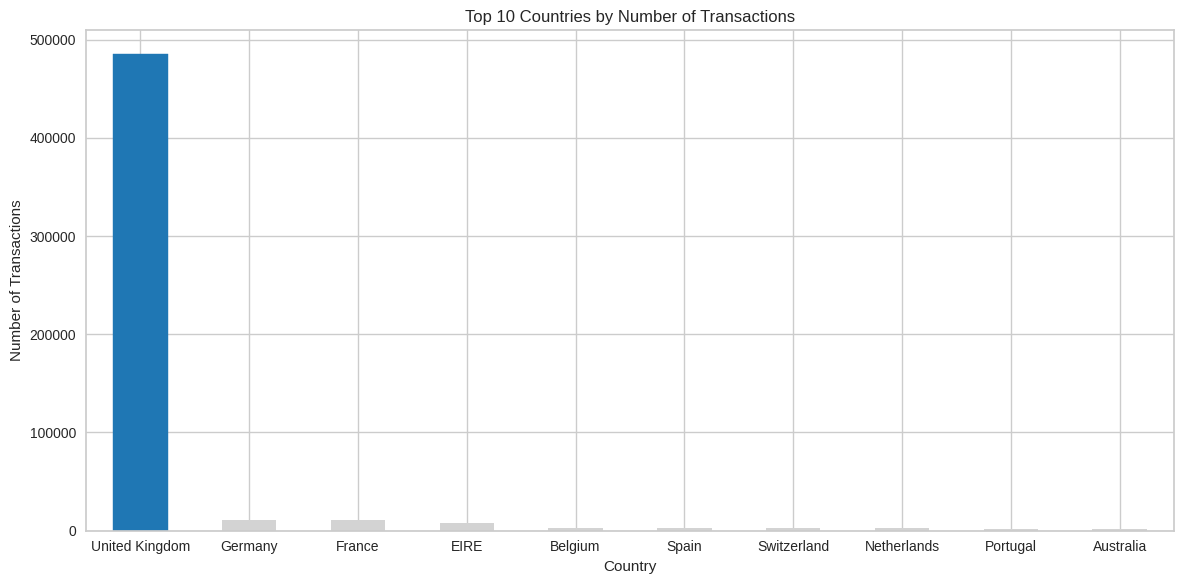

In [38]:
plt.figure(figsize=(12, 6))
country_trans = df['Country'].value_counts().head(10)

ax = country_trans.plot(kind='bar', color='lightgray')
bars = ax.patches
bars[0].set_color('#1f77b4')

plt.title('Top 10 Countries by Number of Transactions')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Key Insight:
- Clear home market dominance (UK)
- Strong presence in Western Europe
- Small but notable reach to Australia
- Large gap between UK and other markets

### Average Transaction Value by Country

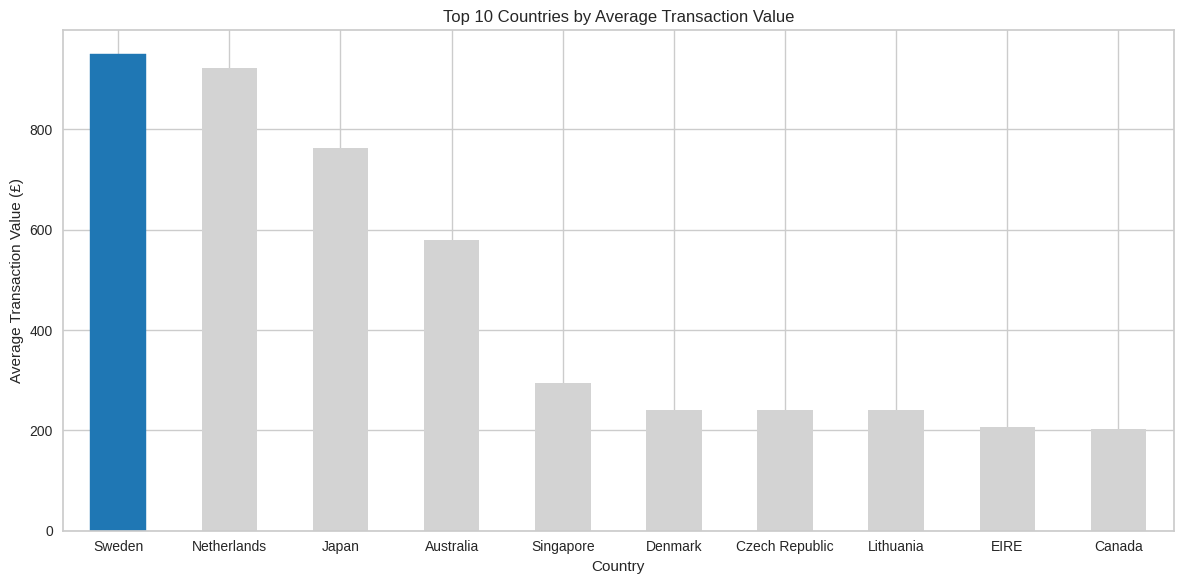

In [39]:
plt.figure(figsize=(12, 6))
avg_value_by_country = df.groupby('Country').apply(
   lambda x: (x['Price'] * x['Quantity']).mean()
).sort_values(ascending=False).head(10)

ax = avg_value_by_country.plot(kind='bar', color='lightgray')
bars = ax.patches
bars[0].set_color('#1f77b4')

plt.title('Top 10 Countries by Average Transaction Value')
plt.xlabel('Country')
plt.ylabel('Average Transaction Value (£)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [40]:
avg_value_by_country

,0
Country,
Sweden,949.742
Netherlands,921.807
Japan,763.594
Australia,580.256
Singapore,295.260
Denmark,241.440
Czech Republic,241.314
Lithuania,240.826
EIRE,206.343


Key Insights:
- Sweden leads with highest per-transaction value
- Strong showing from both European (Netherlands) and Asian (Japan) markets
- Significant value gap between top 4 and others
- Interesting contrast with transaction volume:
  - UK absent from top 10 despite dominating volume
  - Netherlands shows high value but low volume transactions

### Price Distribution by Top Countries

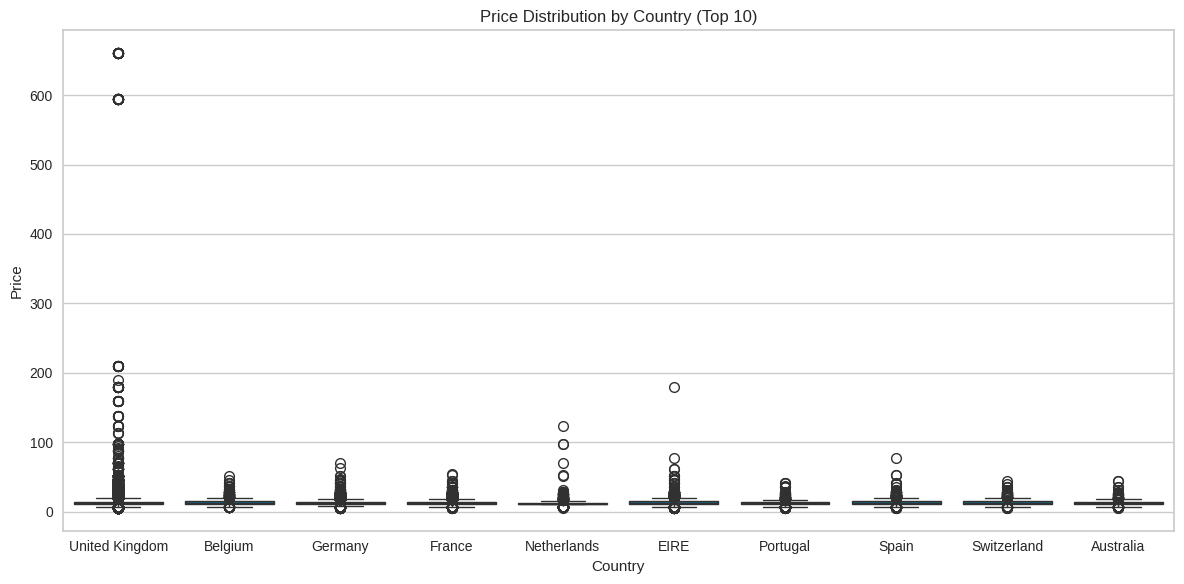

In [41]:
plt.figure(figsize=(12, 6))
top_10_countries = df['Country'].value_counts().head(10).index
sns.boxplot(data=df[df['Country'].isin(top_10_countries)],
            x='Country', y='Price')
plt.title('Price Distribution by Country (Top 10)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

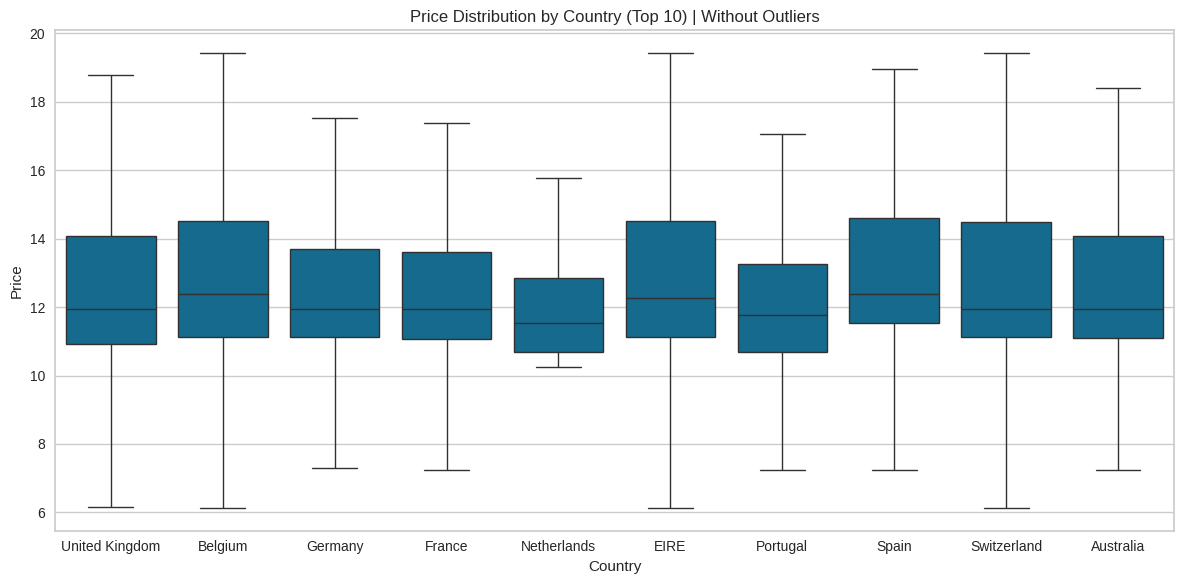

In [42]:
plt.figure(figsize=(12, 6))

# Get top 10 countries by count
top_10_countries = df['Country'].value_counts().head(10).index

# hide outliers
sns.boxplot(data=df[df['Country'].isin(top_10_countries)],
            x='Country',
            y='Price',
            showfliers=False)

plt.title('Price Distribution by Country (Top 10) | Without Outliers')
plt.xlabel('Country')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Overall Price Range:
- Core price range: £10-15 across all countries
- Similar median prices (~£12) across markets
- Consistent IQR (Inter-Quartile Range) patterns



In [43]:
# Geographic statistics
geo_stats = {
    'Total Countries': df['Country'].nunique(),
    'Top 3 Countries': df['Country'].value_counts().head(3).to_dict(),
    'Country with Highest Avg Transaction': avg_value_by_country.index[0],
    'International Orders': (df['Country'] != df['Country'].mode()[0]).mean() * 100,
    'Orders per Country (Mean)': df.groupby('Country').size().mean()
}

geo_stats

{'Total Countries': 38,
 'Top 3 Countries': {'United Kingdom': 485095,
  'Germany': 10675,
  'France': 10526},
 'Country with Highest Avg Transaction': 'Sweden',
 'International Orders': 9.556259904912837,
 'Orders per Country (Mean)': 14114.473684210527}

# **5. Data Preprocessing**

## Drop Missing Values

In [44]:
print(df.isnull().sum())

TransactionNo      0
Date               0
ProductNo          0
ProductName        0
Price              0
Quantity           0
CustomerNo        55
Country            0
DayOfWeek          0
Quantity_Range     0
dtype: int64


In [45]:
# Since CustomerNo is an identifier and we only have 55 missing values (0.01%),
# we'll drop these rows as they represent a very small portion of our dataset
df = df.dropna(subset=['CustomerNo'])

In [46]:
df.isnull().sum()

,0
TransactionNo,0
Date,0
ProductNo,0
ProductName,0
Price,0
Quantity,0
CustomerNo,0
Country,0
DayOfWeek,0
Quantity_Range,0


## Remove Duplicates

In [47]:
len(df[df.duplicated()])

5200

In [48]:
# Check duplicates by business columns
business_columns = ['CustomerNo', 'Date', 'ProductNo', 'Quantity', 'Price']
duplicates = df[df.duplicated(subset=business_columns, keep=False)]

# Sort and display duplicates by frequency
duplicate_counts = duplicates.groupby(business_columns).size().sort_values(ascending=False)
print("Top 10 most frequent duplicate transactions:")

# Reset index to turn the count into a column
duplicate_counts = duplicate_counts.reset_index(name='Count')
duplicate_counts.head(10)

Top 10 most frequent duplicate transactions:


,CustomerNo,Date,ProductNo,Quantity,Price,Count
0,16923.000,2019-06-05,22698,1,13.270,20
1,16923.000,2019-06-05,22697,1,13.270,12
2,17850.000,2018-12-02,22632,6,12.150,11
3,17850.000,2018-12-02,22633,6,12.150,11
4,17850.000,2018-12-02,82482,6,12.400,11
5,17850.000,2018-12-02,82483,4,15.320,11
6,17850.000,2018-12-02,82494L,6,12.860,11
7,17850.000,2018-12-02,84029E,6,13.720,11
8,17850.000,2018-12-02,84029G,6,13.720,10
9,17850.000,2018-12-02,21068,6,11.340,10


In [49]:
# Display full details of top duplicate transactions
print("\nFull details of most frequent duplicate transaction:")

most_frequent_combination = duplicate_counts.iloc[0]
mask = (df['CustomerNo'] == most_frequent_combination['CustomerNo']) & \
       (df['Date'] == most_frequent_combination['Date']) & \
       (df['ProductNo'] == most_frequent_combination['ProductNo']) & \
       (df['Quantity'] == most_frequent_combination['Quantity']) & \
       (df['Price'] == most_frequent_combination['Price'])
df[mask]


Full details of most frequent duplicate transaction:


,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,DayOfWeek,Quantity_Range
324584,555524,2019-06-05,22698,Pink Regency Teacup And Saucer,13.270,1,16923.000,United Kingdom,Wednesday,Very Low
324585,555524,2019-06-05,22698,Pink Regency Teacup And Saucer,13.270,1,16923.000,United Kingdom,Wednesday,Very Low
324591,555524,2019-06-05,22698,Pink Regency Teacup And Saucer,13.270,1,16923.000,United Kingdom,Wednesday,Very Low
324598,555524,2019-06-05,22698,Pink Regency Teacup And Saucer,13.270,1,16923.000,United Kingdom,Wednesday,Very Low
324599,555524,2019-06-05,22698,Pink Regency Teacup And Saucer,13.270,1,16923.000,United Kingdom,Wednesday,Very Low
324601,555524,2019-06-05,22698,Pink Regency Teacup And Saucer,13.270,1,16923.000,United Kingdom,Wednesday,Very Low
324602,555524,2019-06-05,22698,Pink Regency Teacup And Saucer,13.270,1,16923.000,United Kingdom,Wednesday,Very Low
324603,555524,2019-06-05,22698,Pink Regency Teacup And Saucer,13.270,1,16923.000,United Kingdom,Wednesday,Very Low
324604,555524,2019-06-05,22698,Pink Regency Teacup And Saucer,13.270,1,16923.000,United Kingdom,Wednesday,Very Low
324605,555524,2019-06-05,22698,Pink Regency Teacup And Saucer,13.270,1,16923.000,United Kingdom,Wednesday,Very Low


In [50]:
# Drop duplicates
df = df.drop_duplicates()

In [51]:
len(df[df.duplicated()])

0

## Feature Normalization

In [52]:
# Identify numerical features for clustering
numerical_features = ['Price', 'Quantity']

print("\nOriginal data summary:")
df[numerical_features].describe()


Original data summary:


,Price,Quantity
count,531095.000,531095.000
mean,12.670,9.993
std,8.526,217.710
min,5.130,-80995.000
25%,10.990,1.000
50%,11.940,3.000
75%,14.090,10.000
max,660.620,80995.000


In [53]:
# Create a copy of the DataFrame with only numerical features for scaling
df_for_scaling = df[numerical_features].copy()

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
df_scaled = pd.DataFrame(
    scaler.fit_transform(df_for_scaling),
    columns=numerical_features,
    index=df_for_scaling.index
)

# Check the distribution of scaled features
print("Statistics of scaled features:")
df_scaled.describe()

Statistics of scaled features:


,Price,Quantity
count,531095.000,531095.000
mean,0.000,0.000
std,1.000,1.000
min,-0.884,-372.077
25%,-0.197,-0.041
50%,-0.086,-0.032
75%,0.167,0.000
max,75.995,371.986


In [54]:
# Replace original numerical features with scaled versions
df_scaled_full = df.copy()

In [55]:
df

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,DayOfWeek,Quantity_Range
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.470,12,17490.000,United Kingdom,Monday,High
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.650,36,13069.000,United Kingdom,Monday,Very High
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.530,12,13069.000,United Kingdom,Monday,High
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.650,12,13069.000,United Kingdom,Monday,High
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.940,6,13069.000,United Kingdom,Monday,High
...,...,...,...,...,...,...,...,...,...,...
536345,C536548,2018-12-01,22168,Organiser Wood Antique White,18.960,-2,12472.000,Germany,Saturday,Very Low
536346,C536548,2018-12-01,21218,Red Spotty Biscuit Tin,14.090,-3,12472.000,Germany,Saturday,Very Low
536347,C536548,2018-12-01,20957,Porcelain Hanging Bell Small,11.740,-1,12472.000,Germany,Saturday,Very Low
536348,C536548,2018-12-01,22580,Advent Calendar Gingham Sack,16.350,-4,12472.000,Germany,Saturday,Very Low


## Outliers Handling

In [56]:
# Detect outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return len(outliers), lower_bound, upper_bound

In [57]:
# Check outliers in Price and Quantity
for column in ['Price', 'Quantity']:
    n_outliers, lower, upper = detect_outliers(df, column)
    print(f"\nOutliers in {column}:")
    print(f"Number of outliers: {n_outliers}")
    print(f"Lower bound: {lower:.2f}")
    print(f"Upper bound: {upper:.2f}")
    print(f"Min value: {df[column].min():.2f}")
    print(f"Max value: {df[column].max():.2f}")


Outliers in Price:
Number of outliers: 98356
Lower bound: 6.34
Upper bound: 18.74
Min value: 5.13
Max value: 660.62

Outliers in Quantity:
Number of outliers: 57243
Lower bound: -12.50
Upper bound: 23.50
Min value: -80995.00
Max value: 80995.00


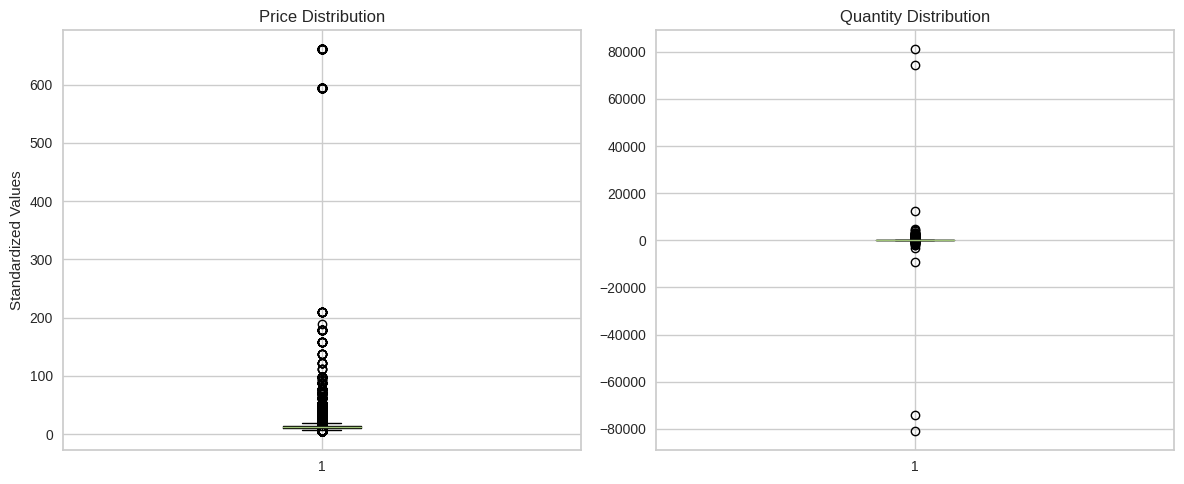

In [58]:
# Visualize outliers with box plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.boxplot(df_scaled_full['Price'])
plt.title('Price Distribution')
plt.ylabel('Standardized Values')

plt.subplot(1, 2, 2)
plt.boxplot(df_scaled_full['Quantity'])
plt.title('Quantity Distribution')

plt.tight_layout()
plt.show()

In [59]:
# Handle outliers by capping
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

In [60]:
# Cap outliers for both features
df_no_outliers = df_scaled_full.copy()
for column in ['Price', 'Quantity']:
    df_no_outliers = cap_outliers(df_no_outliers, column)

# Verify outlier removal
print("\nAfter outlier handling:")
print(df_no_outliers[['Price', 'Quantity']].describe())


After outlier handling:
           Price   Quantity
count 531095.000 531095.000
mean      12.303      6.597
std        3.312      7.267
min        6.340    -12.500
25%       10.990      1.000
50%       11.940      3.000
75%       14.090     10.000
max       18.740     23.500


## Categorical Encoding

In [61]:
# Select categorical columns for encoding
categorical_columns = ['Country', 'DayOfWeek']
print("Original categorical columns:", categorical_columns)
print("\nUnique values in each column:")
for col in categorical_columns:
    print(f"\n{col}:", df_no_outliers[col].nunique())
    print(df_no_outliers[col].value_counts().head())

Original categorical columns: ['Country', 'DayOfWeek']

Unique values in each column:

Country: 38
Country
United Kingdom    479950
Germany            10656
France             10509
EIRE                8024
Belgium             2539
Name: count, dtype: int64

DayOfWeek: 6
DayOfWeek
Sunday      101935
Friday       99960
Thursday     93427
Saturday     92680
Monday       80449
Name: count, dtype: int64


In [62]:
# Perform one-hot encoding
df_encoded = pd.get_dummies(df_no_outliers, columns=categorical_columns, prefix=categorical_columns)

In [63]:
# Verify encoding
print("\nShape before encoding:", df_no_outliers.shape)
print("Shape after encoding:", df_encoded.shape)
print("\nNew columns created:", list(set(df_encoded.columns) - set(df_no_outliers.columns)))


Shape before encoding: (531095, 10)
Shape after encoding: (531095, 52)

New columns created: ['Country_Poland', 'Country_Denmark', 'Country_European Community', 'Country_Germany', 'Country_Greece', 'Country_France', 'Country_Japan', 'Country_Iceland', 'Country_Saudi Arabia', 'Country_Czech Republic', 'Country_Cyprus', 'DayOfWeek_Monday', 'Country_RSA', 'Country_Unspecified', 'Country_Austria', 'Country_Netherlands', 'Country_Channel Islands', 'DayOfWeek_Saturday', 'Country_Belgium', 'Country_United Arab Emirates', 'DayOfWeek_Friday', 'Country_Hong Kong', 'DayOfWeek_Wednesday', 'Country_Finland', 'Country_Norway', 'Country_Switzerland', 'DayOfWeek_Sunday', 'Country_Brazil', 'DayOfWeek_Thursday', 'Country_Lebanon', 'Country_Singapore', 'Country_Australia', 'Country_Israel', 'Country_Italy', 'Country_United Kingdom', 'Country_USA', 'Country_Lithuania', 'Country_Portugal', 'Country_Sweden', 'Country_EIRE', 'Country_Bahrain', 'Country_Canada', 'Country_Spain', 'Country_Malta']


In [64]:
# Check final encoded dataset
print("\nFinal encoded dataset info:")
df_encoded.info()


Final encoded dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 531095 entries, 0 to 536349
Data columns (total 52 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   TransactionNo                 531095 non-null  object        
 1   Date                          531095 non-null  datetime64[ns]
 2   ProductNo                     531095 non-null  object        
 3   ProductName                   531095 non-null  object        
 4   Price                         531095 non-null  float64       
 5   Quantity                      531095 non-null  float64       
 6   CustomerNo                    531095 non-null  float64       
 7   Quantity_Range                531095 non-null  category      
 8   Country_Australia             531095 non-null  bool          
 9   Country_Austria               531095 non-null  bool          
 10  Country_Bahrain               531095 non-null  bool     

## Data Binning

In [65]:
# Binning for Price
df_encoded['Price_Bin'] = pd.qcut(df_encoded['Price'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

In [66]:
# Binning for Quantity
df_encoded['Quantity_Bin'] = pd.qcut(df_encoded['Quantity'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

In [67]:
# Check binning results
print("Price Bins Distribution:")
print(df_encoded['Price_Bin'].value_counts())
print("\nQuantity Bins Distribution:")
print(df_encoded['Quantity_Bin'].value_counts())

Price Bins Distribution:
Price_Bin
Very Low     116189
Low          109023
Very High    105344
Medium       103658
High          96881
Name: count, dtype: int64

Quantity Bins Distribution:
Quantity_Bin
Very Low     151265
Medium       127049
High         101907
Low           80784
Very High     70090
Name: count, dtype: int64


In [68]:
# Convert bins to numeric for clustering
df_encoded['Price_Bin'] = pd.qcut(df_encoded['Price'], q=5, labels=False)
df_encoded['Quantity_Bin'] = pd.qcut(df_encoded['Quantity'], q=5, labels=False)

In [69]:
# Final preprocessing check
print("\nFinal preprocessed dataset shape:", df_encoded.shape)
print("\nSample of final preprocessed data:")
df_encoded.head()


Final preprocessed dataset shape: (531095, 54)

Columns in final dataset: ['TransactionNo', 'Date', 'ProductNo', 'ProductName', 'Price', 'Quantity', 'CustomerNo', 'Quantity_Range', 'Country_Australia', 'Country_Austria', 'Country_Bahrain', 'Country_Belgium', 'Country_Brazil', 'Country_Canada', 'Country_Channel Islands', 'Country_Cyprus', 'Country_Czech Republic', 'Country_Denmark', 'Country_EIRE', 'Country_European Community', 'Country_Finland', 'Country_France', 'Country_Germany', 'Country_Greece', 'Country_Hong Kong', 'Country_Iceland', 'Country_Israel', 'Country_Italy', 'Country_Japan', 'Country_Lebanon', 'Country_Lithuania', 'Country_Malta', 'Country_Netherlands', 'Country_Norway', 'Country_Poland', 'Country_Portugal', 'Country_RSA', 'Country_Saudi Arabia', 'Country_Singapore', 'Country_Spain', 'Country_Sweden', 'Country_Switzerland', 'Country_USA', 'Country_United Arab Emirates', 'Country_United Kingdom', 'Country_Unspecified', 'DayOfWeek_Friday', 'DayOfWeek_Monday', 'DayOfWeek_S

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Quantity_Range,Country_Australia,Country_Austria,Country_Bahrain,Country_Belgium,Country_Brazil,Country_Canada,Country_Channel Islands,Country_Cyprus,Country_Czech Republic,Country_Denmark,Country_EIRE,Country_European Community,Country_Finland,Country_France,Country_Germany,Country_Greece,Country_Hong Kong,Country_Iceland,Country_Israel,Country_Italy,Country_Japan,Country_Lebanon,Country_Lithuania,Country_Malta,Country_Netherlands,Country_Norway,Country_Poland,Country_Portugal,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Wednesday,Price_Bin,Quantity_Bin
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,18.740,12.000,17490.000,High,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,4,3
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.650,23.500,13069.000,Very High,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,0,4
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.530,12.000,13069.000,High,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,1,3
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.650,12.000,13069.000,High,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,0,3
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.940,6.000,13069.000,High,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,2,2


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [70]:
# # Prepare features for clustering
# # Select relevant numerical features
clustering_features = [
    'Price', 'Quantity',
    'Price_Bin', 'Quantity_Bin',
    # Include encoded country columns
    *[col for col in df_encoded.columns if col.startswith('Country_')],
    # Include encoded day columns
    *[col for col in df_encoded.columns if col.startswith('DayOfWeek_')]
]

X = df_encoded[clustering_features]
# print("Features used for clustering:", clustering_features)
# print("Shape of clustering data:", X.shape)

In [71]:
# # Try different values of k
# k_values = range(2, 11)
# inertias = []
# silhouette_scores = []

# for k in k_values:
#     # Train KMeans
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(X)

#     # inertia
#     inertias.append(kmeans.inertia_)

#     # silhouette score
#     sil_score = silhouette_score(X, kmeans.labels_)
#     silhouette_scores.append(sil_score)

#     print(f"k={k}, Silhouette Score: {sil_score:.3f}")

In [72]:
# # Calculate feature variance
# from sklearn.decomposition import PCA

# # Calculate variance of each feature
# feature_variance = pd.DataFrame({
#     'Feature': X.columns,
#     'Variance': X.var().values
# })
# feature_variance = feature_variance.sort_values('Variance', ascending=False)

# print("Feature variance:")
# print(feature_variance)

In [73]:
# # PCA to understand feature importance
pca = PCA()
pca_result = pca.fit_transform(X)

# # Calculate explained variance ratio
explained_variance_ratio = pd.DataFrame({
    'Component': range(1, len(pca.explained_variance_ratio_) + 1),
    'Explained_Variance_Ratio': pca.explained_variance_ratio_,
    'Cumulative_Variance_Ratio': np.cumsum(pca.explained_variance_ratio_)
})

print("\nPCA Explained Variance:")
print(explained_variance_ratio)


PCA Explained Variance:
    Component  Explained_Variance_Ratio  Cumulative_Variance_Ratio
0           1                     0.807                      0.807
1           2                     0.169                      0.976
2           3                     0.006                      0.982
3           4                     0.004                      0.985
4           5                     0.003                      0.988
5           6                     0.003                      0.991
6           7                     0.003                      0.993
7           8                     0.002                      0.996
8           9                     0.002                      0.997
9          10                     0.001                      0.999
10         11                     0.000                      0.999
11         12                     0.000                      0.999
12         13                     0.000                      0.999
13         14                     0.0

In [74]:
# # Select important features based on PCA loadings

# # Get feature importance from first few principal components
n_components = 3
feature_importance = pd.DataFrame(
    abs(pca.components_[:n_components].T),
    columns=[f'PC{i+1}' for i in range(n_components)],
    index=X.columns
)
feature_importance['Mean_Importance'] = feature_importance.mean(axis=1)
feature_importance = feature_importance.sort_values('Mean_Importance', ascending=False)

# print("\nFeature Importance from PCA:")
# print(feature_importance)

In [75]:
# # Select top features and try clustering again

# # Select top features that explain most variance
top_features = feature_importance.head(5).index.tolist()
X_selected = X[top_features]

# print("\nSelected features for clustering:", top_features)

# # Try clustering with selected features
# k_values = range(2, 11)
# silhouette_scores_new = []

# for k in k_values:
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(X_selected)
#     sil_score = silhouette_score(X_selected, kmeans.labels_)
#     silhouette_scores_new.append(sil_score)
#     print(f"k={k}, New Silhouette Score with selected features: {sil_score:.3f}")

In [76]:
# # DBSCAN
# from sklearn.cluster import DBSCAN
# from sklearn.preprocessing import StandardScaler

# # Standardize features for DBSCAN
# scaler = StandardScaler()
# X_std = scaler.fit_transform(X_selected)

# # Try different eps values
# eps_values = [0.1, 0.3, 0.5, 0.7, 1.0]
# min_samples_values = [5, 10, 15, 20]

# best_silhouette = -1
# best_params = None

# print("DBSCAN Results:")
# for eps in eps_values:
#     for min_samples in min_samples_values:
#         dbscan = DBSCAN(eps=eps, min_samples=min_samples)
#         clusters = dbscan.fit_predict(X_std)

#         # Skip if all points are noise (-1)
#         if len(np.unique(clusters)) < 2:
#             continue

#         # Calculate silhouette score (excluding noise points)
#         mask = clusters != -1
#         if sum(mask) > 1:  # Need at least 2 points for silhouette score
#             sil_score = silhouette_score(X_std[mask], clusters[mask])
#             print(f"eps={eps}, min_samples={min_samples}")
#             print(f"Silhouette Score: {sil_score:.3f}")
#             print(f"Number of clusters: {len(np.unique(clusters[clusters != -1]))}")
#             print(f"Number of noise points: {sum(clusters == -1)}\n")

#             if sil_score > best_silhouette:
#                 best_silhouette = sil_score
#                 best_params = (eps, min_samples)

In [77]:
# Cell 1: Import and setup
from sklearn.cluster import MeanShift, estimate_bandwidth
import numpy as np

# Prepare data
X_std = StandardScaler().fit_transform(X_selected)

In [78]:
# Cell 2: Estimate bandwidth
# Bandwidth affects the size of the sliding window
# quantile determines bandwidth size (lower = more clusters)
print("Estimating bandwidth...")
bandwidth = estimate_bandwidth(X_std, quantile=0.2, n_samples=500)
print(f"Estimated bandwidth: {bandwidth:.3f}")

Estimating bandwidth...
Estimated bandwidth: 1.700


In [ ]:
# Cell 1: Try higher quantiles
higher_quantiles = [0.6, 0.7, 0.8, 0.9, 1.0]
results = []

for q in higher_quantiles:
    # Estimate bandwidth
    bandwidth = estimate_bandwidth(X_std, quantile=q, n_samples=500)

    # Apply Mean Shift
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(X_std)
    labels = ms.labels_
    n_clusters = len(np.unique(labels))

    # Calculate silhouette score if more than one cluster
    if n_clusters > 1:
        sil_score = silhouette_score(X_std, labels)
    else:
        sil_score = 0

    results.append({
        'quantile': q,
        'bandwidth': bandwidth,
        'n_clusters': n_clusters,
        'silhouette': sil_score
    })

    print(f"\nQuantile: {q}")
    print(f"Bandwidth: {bandwidth:.3f}")
    print(f"Number of clusters: {n_clusters}")
    print(f"Silhouette Score: {sil_score:.3f}")
    print(f"Cluster sizes: {np.bincount(labels)}")


Quantile: 0.3
Bandwidth: 2.075
Number of clusters: 2
Silhouette Score: 0.389
Cluster sizes: [453267  77828]

Quantile: 0.4
Bandwidth: 2.319
Number of clusters: 2
Silhouette Score: 0.421
Cluster sizes: [474530  56565]

Quantile: 0.5
Bandwidth: 2.624
Number of clusters: 2
Silhouette Score: 0.433
Cluster sizes: [479950  51145]


## **b. Evaluasi Model Clustering**

In [ ]:
#Type your code here

## **c. Feature Selection (Opsional)**

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [ ]:
#Type your code here

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
#Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.